In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
train_dir = ("/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train")
test_dir = ("/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/test")
classes_train =os.listdir(train_dir)
classes_test =os.listdir(test_dir)
classes_train

['PNEUMONIA', 'NORMAL']

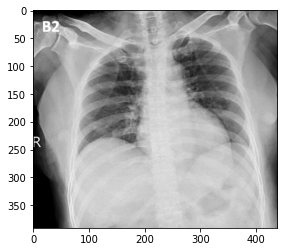

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-003-b2.png"))

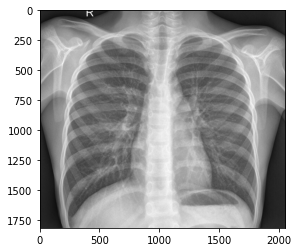

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/train/NORMAL/IM-0007-0001.jpeg"))

In [ ]:
train_datagen=ImageDataGenerator(
    #zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size= 16,
    target_size=(1000,1000,3)[:2]
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=16,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
model=Sequential() 

model.add(Conv2D(32,(2,2),activation='relu',input_shape=(1000,1000,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 999, 999, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 499, 499, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 498, 498, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 166, 166, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 164, 164, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0

In [ ]:
model.fit(
    train_generator, 
    epochs=14,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/14
10/10 [==============================] - 243s 21s/step - loss: 2.6846 - accuracy: 0.5338 - val_loss: 0.5722 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/14
10/10 [==============================] - 191s 19s/step - loss: 0.5532 - accuracy: 0.8108 - val_loss: 0.3076 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 3/14
10/10 [==============================] - 199s 20s/step - loss: 0.4166 - accuracy: 0.7838 - val_loss: 0.0669 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/14
10/10 [==============================] - 201s 19s/step - loss: 0.3928 - accuracy: 0.8851 - val_loss: 0.0930 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/14
10/10 [==============================] - 188s 18s/step - loss: 0.3025 - accuracy: 0.8581 - val_loss: 0.0727 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/14
10/10 [==============================] - 189s 18s/step - loss: 0.2989 - accuracy: 0.8851 - val_loss: 0.0833 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/14
10/10 [==============================] - 204s 19s/step - lo

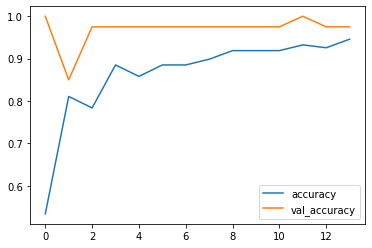

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

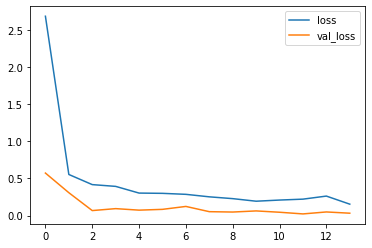

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.evaluate(test_generator)

3/3 [==============================] - 12s 3s/step - loss: 0.0315 - accuracy: 0.9750


[0.03151022642850876, 0.9750000238418579]

In [ ]:
real = test_generator.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions = model.predict_generator(test_generator) > 0.5
predictions

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True]])

AxesSubplot(0.241667,0.125;0.503333x0.755)
report :               precision    recall  f1-score   support

           0       0.43      0.45      0.44        20
           1       0.42      0.40      0.41        20

    accuracy                           0.42        40
   macro avg       0.42      0.43      0.42        40
weighted avg       0.42      0.42      0.42        40



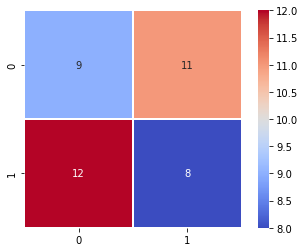

In [ ]:
con = confusion_matrix(real, predictions)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions ))

In [ ]:
predict_path='/content/drive/MyDrive/machine learning projects/training set/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg'
my_image = image.load_img(predict_path,target_size=(1000,1000,3))

In [ ]:
my_image = np.expand_dims(my_image,axis = 0)

In [ ]:
np.argmax(model.predict(my_image))

0